In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("games.csv")
df["Sales_million"] = df["Sales_million"].astype(float)


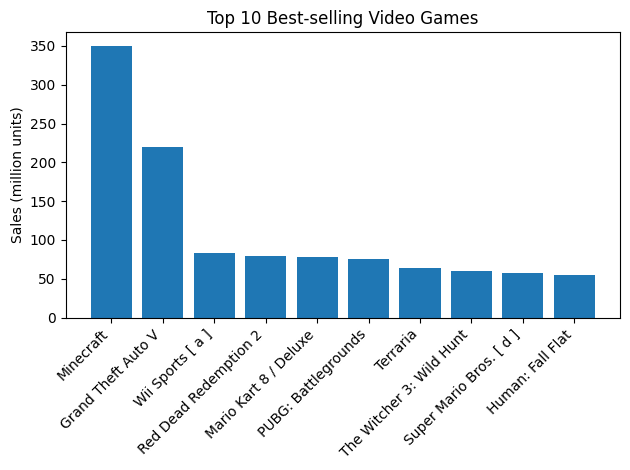

In [3]:
# KPI_1 Top 10 Game Sales Bar Chart

top10 = df.sort_values("Sales_million", ascending=False).head(10)

plt.figure()
plt.bar(top10["Title"], top10["Sales_million"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sales (million units)")
plt.title("Top 10 Best-selling Video Games")
plt.tight_layout()
plt.show()


In [15]:
# KPI_2 Total Sales of whole games

total_sales = df["Sales_million"].sum()
print("Total sales (million):", total_sales)



Total sales (million): 2169.24


In [ ]:
# KPI_3 Median sales of whole games

median_sales = df["Sales_million"].median()
print("Median sales (million):", median_sales)

Median sales of (million): 34.5


In [25]:
# KPI_4 The sales percentage of the top 5 products in total sales 

top5_sales = df.sort_values("Sales_million", ascending=False).head(5)["Sales_million"].sum()
others_sales = total_sales - top5_sales
print(f"Top 5 share (%): {top5_sales / total_sales * 100:.2f}")


Top 5 share (%): 37.34


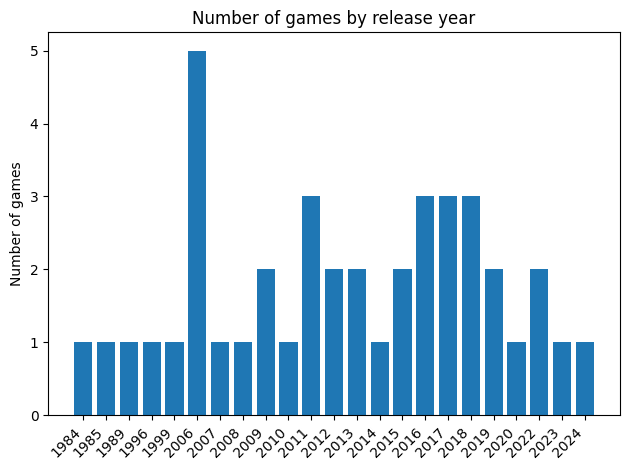

In [ ]:
# KPI_5 Number of games by release year (bar chart)

year_counts = df["Year"].value_counts().sort_index()
x=year_counts.index.astype(int)

plt.figure()
plt.bar(x.astype(str), year_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of games")
plt.title("Number of games by release year")
plt.tight_layout()
plt.show()


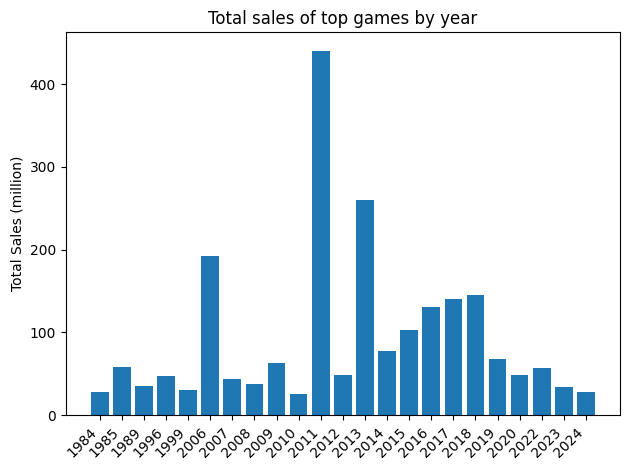

In [ ]:
# KPI_6 Total sales by year of release (bar chart)

sales_by_year = df.groupby("Year")["Sales_million"].sum().sort_index()
x=year_counts.index.astype(int)

plt.figure()
plt.bar(x.astype(str), sales_by_year.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Sales (million)")
plt.title("Total sales by year of release")
plt.tight_layout()
plt.show()


In [ ]:
# KPI_7 Distribution by sales range

bins = [0, 20, 40, 60, 80, 1000]  
labels = ["0~20", "20~40", "40~60", "60~80", "80+"]
df["Sales_bin"] = pd.cut(df["Sales_million"], bins=bins, labels=labels, right=False)

bin_counts = df["Sales_bin"].value_counts().sort_index()
print(bin_counts)


Sales_bin
0–20      0
20–40    25
40–60     9
60–80     5
80+       3
Name: count, dtype: int64


In [18]:
# KPI_8 Sales by series

series_col = [c for c in df.columns if "Series" in c or "series" in c][0]

sales_by_series = (
    df.groupby(series_col)["Sales_million"]
      .sum()
      .sort_values(ascending=False)
)

print(sales_by_series.head(10))

Series
Minecraft           350.00
Grand Theft Auto    220.00
Wii                 187.86
Pokémon             183.22
Super Mario         173.31
Call of Duty        160.90
Mario Kart          115.40
Red Dead             79.00
PUBG Universe        75.00
The Witcher          60.00
Name: Sales_million, dtype: float64


In [27]:
# KPI_9 Number of games released on single and multiple platforms

import re

platform_col = [c for c in df.columns if "Platform" in c or "platform" in c][0]

def platform_type(s):
    if pd.isna(s):
        return "Unknown"
    s = str(s).strip()
    if "Multi-platform" in s:
        return "Multi-platform"
    
    parts = re.split(r"[,/]", s)
    parts = [p.strip() for p in parts if p.strip()]

    return "Single-platform" if len(parts) == 1 else "Multi-platform"

df["Platform_type"] = df[platform_col].apply(platform_type)

type_counts = df["Platform_type"].value_counts()
print(type_counts)


Platform_type
Multi-platform     25
Single-platform    17
Name: count, dtype: int64


In [ ]:
# KPI_10 Sales of the oldest and latest game

df_year_valid = df.dropna(subset=["Year"]).copy()
df_year_valid["Year"] = df_year_valid["Year"].astype(int)

oldest_game = df_year_valid.sort_values("Year").head(1)
newest_game = df_year_valid.sort_values("Year").tail(1)

print("The oldest game:")
print(oldest_game[["Title", "Year", "Sales_million"]])
print("The latest gane")
print(newest_game[["Title", "Year", "Sales_million"]])

The oldest game:
              Title  Year  Sales_million
29  Duck Hunt [ o ]  1984           28.3
The latest gane
                 Title  Year  Sales_million
31  Black Myth: Wukong  2024           28.0
